<a href="https://colab.research.google.com/github/Daniel-ASG/Course_Classes/blob/main/Clustering_B%C3%A1sico_k_means%2C_DBSCAN_e_mean_shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Análise exploratória

Imagine que você está trabalhando como cientista de dados em uma dessas empresas grandes de logística. Nesse caso, seu trabalho é organizar dados!

Seu chefe então te mandou um conjunto de vinhos e pediu para que você os organizasse.



In [2]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv')
print(f'O dataframe possui {df.shape[0]} amostras e {df.shape[1]} atributos.\n\n')
display(df.head())

O dataframe possui 178 amostras e 14 atributos.




,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.rename(columns={'Alcohol': 'Alcool', 
                   'Ash': 'Po', 
                   'Ash_Alcanity': 'Alcalinidade_po', 
                   'Magnesium': 'Magnesio',
                   'Color_Intensity': 'Intensidade_de_cor'
                   }, inplace=True)
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Vamos saber a relação que existe entre os atributos do dataframe, para saber quais são realmente fundamentais para o seu DataFrame e quais não são.

In [6]:
pip install biokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.9/144.9 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [7]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


In [8]:
matriz_corr = df.corr()
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


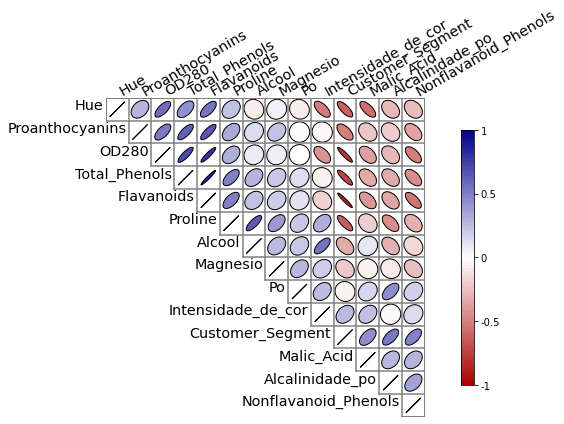

In [9]:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper='ellipse', fontsize='x-large')
fig = plt.gcf()
fig.set_size_inches(20,8);

Chegamos a algumas conclusões:
* “Total_Fenois” é bastante correlacionado com “Flavanoids”
* A correlação entre “Hue” e “Malic_Acid” é uma correlação negativa

Isso é muito bom quando nós queremos remover alguns atributos de informação redundante. Nós poderíamos remover um deles e deixar o nosso DataFrame menor, com isso nós necessitaríamos de menos espaço para armazenar os nossos dados e também poderíamos utilizar modelos de inteligência artificial menor.

Como nós podemos perceber, os atributos dos nossos dados variam diferentemente. 

A maioria dos modelos de inteligência artificial e clusterização não trabalham bem com dados que variam de maneira diferente. Para nós resolvermos esse problema vai ser necessário colocarmos os nossos atributos variando na mesma faixa, ou seja, de 0 a 1 e de -1 a 1 através de um processo chamado normalização.

Nós iremos utilizar uma forma de normalização chamado “MinMaxScaler”, ou seja, normalização pelo mínimo e pelo máximo.

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()

d = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(d, columns=df.columns)
df_normalized.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


Como nós podemos perceber agora, todos os atributos das nossas amostras estão variando de 0 a 1.

In [12]:
df_normalized.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos fazer a transformação inversa e obter o dataframe original a partir do normalizado.

In [13]:
d = min_max_scaler.inverse_transform(df_normalized)
df = pd.DataFrame(d, columns=df_normalized.columns)
display(df.head())
print('\n\n')
display(df.describe())

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0


,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# Aula 2 - K-means

O método de clusterização K-means classifica os objetos dentro de múltiplos grupos, de forma que a variação intra-cluster seja minimizada pela soma dos quadrados das distâncias Euclidianas entre os itens e seus centroides.

Os pontos de dados dentro de um cluster são homogêneas e heterogêneas para grupos de pares.

Como K-means faz os clusters:

1. K-means pega número k de pontos para cada grupo conhecido como centróide.
2. Cada ponto de dados forma um cluster com o centróide mais próximo, i.e. k aglomerados.
3. Encontra-se o centróide de cada cluster com base em membros do cluster existente. Aqui temos novos centróides.
4. Em tendo novos centróides, repita o passo 2 e 3. Encontre a distância mais próxima para cada ponto de dados a partir de novos centróides e os associe com as novas-k clusters. Repita este processo até que a convergência ocorra, isto é, os centróides não mudem.

In [14]:
from sklearn.cluster import KMeans

In [15]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(df)

KMeans(n_clusters=4)

In [16]:
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[0 0 0 3 1 3 3 3 0 0 3 3 3 0 3 3 3 0 3 1 1 1 0 0 1 1 0 3 0 0 3 3 0 3 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 3 0 3 0 3 0 0 0 3 3 2 1 2 1 2 2 1 2 2 1 1 0 2 2 0
 0 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 0 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 0 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


In [17]:
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[3 3 1 1 0 1 1 1 3 3 1 1 1 3 1 1 1 3 1 3 0 0 3 3 3 3 1 1 3 3 1 1 3 1 3 3 3
 3 3 0 0 3 3 0 3 3 3 3 3 1 3 1 1 1 3 3 3 1 1 2 0 2 0 2 2 0 2 2 0 0 3 2 2 3
 3 2 2 2 0 2 2 0 0 2 2 2 2 0 0 0 2 2 2 2 2 3 0 2 0 2 0 0 2 2 0 2 2 2 2 0 0
 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 3 3 2 0
 0 0 2 2 2 0 0 0 2 3 0 0 2 0 0 0 0 2 0 0 0 0 2 2 0 0 0 3 3 0]


A visualização dos clusters na forma de lista não ajuda muito a perceber a distribuição dos dados.

Para facilitar isso iremos visualizar esses clusters num gráfico 2D.

In [18]:
df_normalized['labels'] = labels
df_normalized.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment,labels
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0,3
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0,3
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0,0


In [19]:
fig = px.scatter(df_normalized, x='Intensidade_de_cor', y='Alcool', color='labels', width=800, height=800)
fig.show()

Agora podemos perceber cada grupo representado por sua respectiva cor.

Vamos testar a clusterização com outra quantidade de clusters.

In [20]:
df_normalized.drop('labels', axis=1, inplace=True)
agrupador = KMeans(n_clusters=3)
agrupador.fit(df_normalized)
labels = agrupador.labels_
df_normalized['labels'] = labels
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
fig = px.scatter(df_normalized, x='Intensidade_de_cor', y='Alcool', color='labels', width=800, height=800)
fig.show()

Como nós podemos perceber ficou melhor organizado, os grupos ficaram mais bem definidos.

Vamos agora passar para o gráfico 3D.

In [22]:
fig = px.scatter_3d(df_normalized, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
fig.show()

Já temos o gráfico 3D, mas não sabemos onde estão os centróides. Vamos adicioná-los.

In [23]:
df_normalized.drop('labels', axis=1, inplace=True)
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = df_normalized.columns
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
1,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [24]:
df_normalized['labels'] = labels
fig.add_trace(go.Scatter3d(x=centros.Intensidade_de_cor, 
                           y=centros.Alcool, 
                           z=centros.Proline, 
                           mode='markers',
                           marker=dict(color='cyan'),
                           text=[0,1,2]))
df_normalized.drop('labels', axis=1, inplace=True)
fig.show()

# Aula 3 - DBSCAN

DBSCAN significa “Density-Based Spatial Clustering of Applications with Noise”, ou seja, “Agrupamento Espacial Baseado em Densidade para Aplicações com Ruído”.

Por que utilizar? O K-means não funciona bem quando os nossos clusters não têm simetria radial.

O DBSCAN define uma distância mínima para que os pontos sejam considerados vizinhos, essa distância é chamada de “eps”. Ele inicializa em uma amostra aleatória, verifica todos os vizinhos dessa amostra e vai fazendo isso até que ele encontre uma amostra que não tenha mais vizinhos, ou seja, até ele não possa mais expandir.

O objetivo do algoritmo é fazer com que cada grupo tenha pelo menos um número mínimo ou a densidade mínima (min_samples) de pontos vizinhos, considerando como condição de vizinhança uma distancia menor ou igual a “eps”, que é o “epsilon”.

Vantagens do DBSCAN:
* Ele é robusto a “outliers”, ou seja, ele é robusto a ruído. 
* Ele pode detectar qualquer tipo de forma de cluster. 
* O custo computacional dele não é tão alto.
* Ele é o segundo algoritmo de clusterização mais utilizado, ou seja, ele é muito popular.

Desvantagens:
* Ele não funciona bem com dados de alta dimensionalidade, assim como no KMeans, porque as métricas de distância acabam perdendo um pouco de sentido.
* Ele não consegue identificar clusters de várias densidades porque o “min_samples” é fixo e o “eps” também. Se eles fossem variáveis, de alguma maneira talvez ele conseguisse fazer isso.
* A parametrização de “eps” e “min_samples” nem sempre são fáceis.


In [25]:
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps=1.31, min_samples=15, metric='manhattan')
agrupador.fit(df_normalized)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [26]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [27]:
np.unique(agrupador.labels_)

array([-1,  0,  1,  2])

Vamos diminuir o eps e ver como o DBSCAN responde.

In [28]:
labels = agrupador.labels_
df_normalized['labels'] = labels
fig = px.scatter_3d(df_normalized, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
df_normalized.drop('labels', axis=1, inplace=True)
fig.show()

In [29]:
agrupador = DBSCAN(eps=0.01, min_samples=15, metric='manhattan')
agrupador.fit(df_normalized)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Todos os nossos dados ou todas as nossas amostras foram consideradas como ruído. 

Quando nós utilizamos um valor muito pequeno de “eps” nós falamos que os vizinhos eram só as amostras que estivessem muito pertos e provavelmente nós tínhamos poucas amostras desse jeito.

Agora vamos verificar eps=10

In [30]:
agrupador = DBSCAN(eps=10, min_samples=15, metric='manhattan')
agrupador.fit(df_normalized)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Todas as nossas amostras foram consideradas no mesmo cluster.

Vamos experimentar eps=1.5 e min_samples=30

In [31]:
agrupador = DBSCAN(eps=1.5, min_samples=30, metric='manhattan')
agrupador.fit(df_normalized)
agrupador.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [32]:
labels = agrupador.labels_
df_normalized['labels'] = labels
fig = px.scatter_3d(df_normalized, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
df_normalized.drop('labels', axis=1, inplace=True)
fig.show()

Ficamos com um único cluster e o resto das amostras como ruído.

Se aumentarmos o min_samples para 80, precisaremos de 80 amostras para formar um cluster. Assim, todas amostram serão ruído.

In [33]:
agrupador = DBSCAN(eps=1.5, min_samples=80, metric='manhattan')
agrupador.fit(df_normalized)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Agora, vamos alterar o parâmetro metric para 'euclidian'.

In [34]:
agrupador = DBSCAN(eps=1.5, min_samples=15, metric='euclidean')
agrupador.fit(df_normalized)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Vamos seguir com uma sequência de testes alterando os parâmetros e observando os resultados:

In [35]:
agrupador = DBSCAN(eps=0.7, min_samples=15, metric='euclidean')
agrupador.fit(df_normalized)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [36]:
labels = agrupador.labels_
df_normalized['labels'] = labels
fig = px.scatter_3d(df_normalized, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
df_normalized.drop('labels', axis=1, inplace=True)
fig.show()

In [37]:
agrupador = DBSCAN(eps=0.3, min_samples=15, metric='euclidean')
agrupador.fit(df_normalized)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [38]:
agrupador = DBSCAN(eps=0.5, min_samples=15, metric='euclidean')
agrupador.fit(df_normalized)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  2,  2, -1, -1, -1,
       -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

In [39]:
labels = agrupador.labels_
df_normalized['labels'] = labels
fig = px.scatter_3d(df_normalized, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
df_normalized.drop('labels', axis=1, inplace=True)
fig.show()

O “eps” e o “min_samples” variam de maneira inversamente proporcional, ou seja, o efeito causado pelo aumento do “eps” é o mesmo efeito causado pela diminuição do “min_samples”. O efeito causado pelo aumento do “min_samples” é o mesmo efeito causado pela diminuição do “eps”.

A métrica de distância influencia bastante, porque ela influencia na forma como eu calculo o “eps”.

Existem outras métricas de distância, além das apresentadas aqui. Para alterar no algoritmo, basta modificar o parâmetro metric. As métricas de distância permitidas são:
* Do scikit-learn: 
    * ‘cityblock’
    * ‘cosine’
    * ‘euclidean’
    * ‘l1’
    * ‘l2’
    * ‘manhattan’]
* Do scipy.spatial.distance: 
    * ‘braycurtis’
    * ‘canberra’
    * ‘chebyshev’
    * ‘correlation’
    * ‘dice’
    * ‘hamming’
    * ‘jaccard’
    * ‘kulsinski’
    * ‘mahalanobis’
    * ‘minkowski’
    * ‘rogerstanimoto’
    * ‘russellrao’
    * ‘seuclidean’
    * ‘sokalmichener’
    * ‘sokalsneath’
    * ‘sqeuclidean’
    * ‘yule’

# Aula 4 - Mean shift

Vamos agora utilizar o método de clusterizaçaõ cahamdo Mean Shift, o qual não tem a necessidade de definirmos parâmetros.

In [40]:
from sklearn.cluster import MeanShift

In [41]:
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [42]:
labels = agrupador.labels_
df['labels'] = labels
fig = px.scatter_3d(df, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
df.drop('labels', axis=1, inplace=True)
fig.show()

O objetivo do algoritmo é agrupar os pontos de acordo com as regiões de alta densidade. 

* Vantagens:
    * K-means não costuma apresentar um bom resultado quando há ruído e grupos de simetria não radial
    * Ele tem menos parâmetros para ser ajustado que o DBSCAN. O único parâmetro que nós mexemos é a largura de banda
    * Ele é robusto aos “outliers”
    * Ele pode detectar qualquer tipo de forma:
        * se você colocar uma largura de banda menor, você acaba detectando formas mais estranhas 
        * larguras de banda maiores podemos detectar formas com simetria mais radial
* Desvantagens:
    * Não funciona bem com dados de alta dimensionalidade
    * A parametrização da largura de banda não é muito simples
    * É computacionalmente caro, porque todo ponto no início é tratado como um cluster

In [43]:
from sklearn.cluster import estimate_bandwidth

In [51]:
BW = estimate_bandwidth(df, quantile=0.1)
agrupador = MeanShift(bandwidth=BW)
agrupador.fit(df)
agrupador.labels_

array([ 4,  4,  8,  9,  5,  9,  7,  7,  4,  4,  9,  7,  7,  8,  9,  7,  7,
        8, 10,  6,  5,  5,  4,  4,  6,  6,  8,  7,  6,  4,  7,  9,  4,  7,
        8,  6,  6,  8,  4,  5,  5,  4,  8,  1,  6,  4,  4,  4,  4,  7,  8,
        7,  8,  7,  4,  8,  4,  7,  7,  0,  1,  3,  1,  3,  3,  1,  0,  0,
        5,  5,  6,  3,  3,  4,  6,  3,  3,  0,  5,  3,  3,  1,  1,  0,  0,
        3,  0,  2,  1,  1,  0,  3,  0,  3,  3,  6,  1,  3,  1,  3,  1,  2,
        3,  3,  1,  3,  0,  0,  3,  1,  2,  3,  2,  3,  3,  3,  0,  3,  3,
        2,  1,  3,  3,  3,  3,  3,  3,  3,  3,  2,  1,  0,  2,  2,  1,  1,
        1,  0,  2,  2,  2,  5,  0,  2,  6,  6,  3,  1,  1,  2,  0,  0,  3,
        1,  1,  5,  0,  6,  1,  1,  0,  1,  2,  1,  1,  0,  1,  1,  5,  1,
        0,  3,  1,  5,  5,  6,  6,  2])

In [52]:
labels = agrupador.labels_
df['labels'] = labels
fig = px.scatter_3d(df, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
df.drop('labels', axis=1, inplace=True)
fig.show()

Com o valor do quantil pequeno (quantile=0.1) nossa região de busca dentro do MeanShift, ou seja, nossa região de cálculo da média e de deslocamento da média ficou muito pequena, acabamos gerando vários clusters, porque o centro dos nossos clusters quase não caminharam então eles, não se agruparam muito.

Se colocarmos um valor grande no quantil, esperamos que aconteça o contrário, que tenhamos dois clusters ou um.

In [53]:
BW = estimate_bandwidth(df, quantile=0.8)
agrupador = MeanShift(bandwidth=BW)
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [54]:
labels = agrupador.labels_
df['labels'] = labels
fig = px.scatter_3d(df, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
df.drop('labels', axis=1, inplace=True)
fig.show()

Vamos buscar um valor de BW que produza 3 clusters.

In [55]:
BW = estimate_bandwidth(df, quantile=0.3)
agrupador = MeanShift(bandwidth=BW)
agrupador.fit(df)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [56]:
labels = agrupador.labels_
df['labels'] = labels
fig = px.scatter_3d(df, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
df.drop('labels', axis=1, inplace=True)
fig.show()

# Aula 5 - Coeficiente de silhueta para avaliação de clusterizações
 

In [57]:
agrupador = KMeans(n_clusters=5)
agrupador.fit(df)
agrupador.labels_

array([4, 4, 4, 1, 3, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 3, 3, 3,
       4, 4, 3, 3, 4, 1, 3, 4, 1, 1, 4, 1, 4, 3, 3, 4, 4, 3, 3, 4, 4, 0,
       3, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 3, 0, 3, 2, 2, 4, 3, 2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 3, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 3, 3, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0, 2, 2, 0, 3, 3, 3,
       3, 0], dtype=int32)

In [58]:
labels = agrupador.labels_
df['labels'] = labels
fig = px.scatter_3d(df, x='Intensidade_de_cor', y='Alcool', z='Proline', color='labels', width=800, height=800)
df.drop('labels', axis=1, inplace=True)
fig.show()

Depois de realizar todos esses tipos de clusterização, K-means, DBSCAN e MeanShift, gostaríamos de saber se existe alguma métrica que indicasse que a clusterização está boa.

Qual é a maneira de nós avaliarmos? Para isso, podemos utilizar uma métrica de coeficiente de silhueta. Ela basicamente analisa o quanto os pontos do cluster estão próximos dos demais pontos do mesmo cluster e afastado dos pontos do cluster vizinho.

Ele vai avaliar uma coisa chamada **coesão**. O quanto eu estou próximo aos elementos do meu grupo. Quanto maior a coesão, melhor o coeficiente de silhueta e de **similaridade**, o quanto eu estou afastado dos elementos do outro bairro. Quanto mais afastado eu estiver deles, melhor.

Quanto maior o valor do coeficiente de silhueta, ou seja, quanto **maior a coesão** e **maior a similaridade**, melhor e mais bem organizado, mais bem agrupado - segundo o critério de distância - estão os meus pontos.

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
faixa_n_clusters = [i for i in range(2,10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [61]:
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k)
    labels = agrupador.fit_predict(df_normalized)
    media_silhueta = silhouette_score(df_normalized, labels)
    valores_silhueta.append(media_silhueta)

In [62]:
fig = px.scatter(x=faixa_n_clusters, y=valores_silhueta,width=600, height=400)
fig.update_layout(title = 'Valores de silhueta médios',
                  xaxis_title = 'Número de Clusters',
                  yaxis_title = 'Valor médio de silhueta')
fig.show()

Como nós podemos perceber, o maior valor de coeficiente de silhueta que nós temos é quando o nosso valor de “K”, que é o número de clusters, é igual a “3”.

Vamos testar agora para o MeanShift.

In [63]:
faixa_quantil = np.linspace(0.02, 0.5, 15)
faixa_quantil

array([0.02      , 0.05428571, 0.08857143, 0.12285714, 0.15714286,
       0.19142857, 0.22571429, 0.26      , 0.29428571, 0.32857143,
       0.36285714, 0.39714286, 0.43142857, 0.46571429, 0.5       ])

In [65]:
valores_silhueta = []
quantil_plot = []
for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(df_normalized, quantile=quantil)
    agrupador = MeanShift(bandwidth=bandwidth)
    labels = agrupador.fit_predict(df_normalized)
    if(len(np.unique(labels)) < len(df_normalized) and len(np.unique(labels)) > 1):
        media_silhueta = silhouette_score(df_normalized, labels)
        valores_silhueta.append(media_silhueta)
        quantil_plot.append(quantil)

In [66]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=quantil_plot,
                         y=valores_silhueta))
fig.update_layout(dict(xaxis_title='Quantil',
                       yaxis_title='Média Silhueta'))
fig.show()

In [67]:
faixa_quantil = np.linspace(0.02, 0.5, 30)
faixa_quantil

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

In [69]:
valores_silhueta = []
quantil_plot = []
for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(df_normalized, quantile=quantil)
    agrupador = MeanShift(bandwidth=bandwidth)
    labels = agrupador.fit_predict(df_normalized)
    if(len(np.unique(labels)) < len(df_normalized) and len(np.unique(labels)) > 1):
        media_silhueta = silhouette_score(df_normalized, labels)
        valores_silhueta.append(media_silhueta)
        quantil_plot.append(quantil)

In [70]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=quantil_plot,
                         y=valores_silhueta))
fig.update_layout(dict(xaxis_title='Quantil',
                       yaxis_title='Média Silhueta'))
fig.show()

Comparando Mean shift, DBSCAN e K-means

In [71]:
agrupador_kmeans = KMeans(n_clusters=3)
agrupador_DBSCAN = DBSCAN(eps=2.1, min_samples=56, metric='manhattan')
BW = estimate_bandwidth(df_normalized, quantile=0.28)
agrupador_meanshift = MeanShift(bandwidth=BW)

labels_kmeans = agrupador_kmeans.fit_predict(df_normalized)
labels_dbscan = agrupador_DBSCAN.fit_predict(df_normalized)
labels_meanshift = agrupador_meanshift.fit_predict(df_normalized)

print(f'Labels K-means: {labels_kmeans}\n')
print(f'Labels DBSCAN: {labels_dbscan}\n')
print(f'Labels MeanShift: {labels_meanshift}\n')

Labels K-means: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Labels DBSCAN: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]

Labels MeanShift: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [72]:
print(f'O coeficiente de silhueta do K-means é: {silhouette_score(df_normalized, labels_kmeans)}\n')
print(f'O coeficiente de silhueta do DBSCAN é: {silhouette_score(df_normalized, labels_dbscan)}\n')
print(f'O coeficiente de silhueta do MeanShift é: {silhouette_score(df_normalized, labels_meanshift)}\n')

O coeficiente de silhueta do K-means é: 0.36950618492736303

O coeficiente de silhueta do DBSCAN é: 0.3016232115094375

O coeficiente de silhueta do MeanShift é: 0.30591528661156275



Com o resultado acima percebemos que o melhor método para este dataset é o K-means com 3 Clusters.

Isso se deve provavelmente ao fato de que a dimensionalidade do dataset ser grande e os métodos DBSCAN e Mean Shift não performam bem nesta situação. Esses dois métodos não conseguiram dividir os dados em clusters muito bem definidos, por isso que eles deram um coeficiente de silhueta não tão bom.

Sempre que nós formos aplicar alguma coisa relacionada clusterização, nós não devemos utilizar apenas uma técnica, mas várias e depois avaliarmos qual delas produziu o melhor resultado segundo algum tipo de análise, que no nosso caso foi o coeficiente de silhueta. Uma vez analisado isso, você define a melhor técnica e utiliza essa para agrupar os seus dados.